In [1]:
from typing import Dict, TypedDict, List
from langgraph.graph import StateGraph, START, END

In [2]:
#Create State Schema
class AgentState(TypedDict):
    number1: int
    operation: str
    number2: int
    finalNumber: int


In [5]:
#Node Creation
def adder(state:AgentState) -> AgentState:
    """This node is to add two numbers"""
    state["finalNumber"] = state["number1"] + state["number2"]

    return state

def subtractor(state:AgentState) -> AgentState:
    """This node is to subtract two numbers"""
    state["finalNumber"] = state["number1"] - state["number2"]

    return state

def decide_next_node(state:AgentState) -> AgentState:
    """This node will select the next node in the graph based on the operation"""
    if state["operation"] == "+":
        return "addition_operation" #Addition Operation Edge
    elif state["operation"] == "-":
        return "subtraction_operation" #Subtraction Operation Edge

In [ ]:
#Creating Graph
graph = StateGraph(AgentState)

graph.add_node("add_node", adder)
graph.add_node("subtract_node", subtractor)
graph.add_node("router_node", lambda state:state) # Pass through function. The output is same as input. Here we are nt changing the state.

graph.add_edge(START, "router_node")

graph.add_conditional_edges(
    "router_node",
    decide_next_node,

    {
        #Edge Name : Node Name
        "addition_operation": "add_node",
        "subtraction_operation": "subtract_node"
    }
)

graph.add_edge("add_node", END)
graph.add_edge("subtract_node", END)

app=graph.compile()

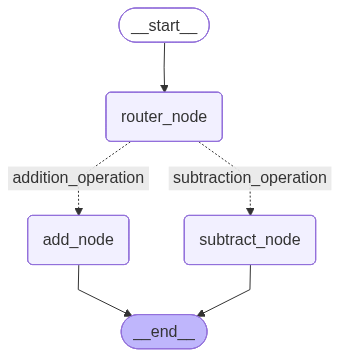

In [16]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [20]:
initial_state_1 = AgentState(number1 = 10, operation = "+", number2 = 5)
print(app.invoke(initial_state_1)["finalNumber"])

15
